In [55]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
path = r'C:\ftllr.csv'
csvFile = pd.read_csv(path)
print(csvFile)

               Timestamp                    Email address               Name:  \
0    14/03/2024 17:03:41          ghoshsoumi691@gmail.com        Soumi ghosh    
1    14/03/2024 17:11:23     rittimachowdhury10@gmail.com  Rittima Chowdhury    
2    14/03/2024 17:20:00     oindrilamajumder56@gmail.com  Oindrila Majumder    
3    14/03/2024 17:24:37              cpayel666@gmail.com  Payel Chakrabarty    
4    14/03/2024 17:30:28         prityoraon1410@gmail.com         Prity Oraon   
..                   ...                              ...                 ...   
183  16/04/2024 00:24:43  skrjdebjotiory4990682@gmail.com        DEBOJOTI ROY   
184  17/04/2024 13:22:29             diyalaha17@gmail.com          Diya Laha    
185  18/04/2024 15:45:23          darkshakhanum@gmail.com             Darksha   
186  21/04/2024 23:56:08             bonicool12@gmail.com    BIJAY BIKASH DAS   
187  21/04/2024 23:58:22           royritika012@gmail.com         Ritika Roy    

           Roll: Stream:   

In [57]:
data = pd.read_csv(path)
data.head()


,Timestamp,Email address,Name:,Roll:,Stream:,School/college:,1. Do you feel positive about the upcoming changes in your life?,2. Will you encounter a new opportunity this week?,3. Are you optimistic about your current financial situation improving?,4. Do you foresee a new relationship in your near future?,...,21. Do you foresee yourself taking a risk that could lead to a major reward?,22. Are you considering making a significant change in your career?,23. Do you feel that your efforts are finally going to be recognized?,24. Is there a potential for a new business venture or collaboration?,25. Do you think you will overcome a fear or phobia soon?,26. Are you expecting to receive support or help from an unexpected source?,27. Do you sense a spiritual or personal awakening in the near future?,28. Will you discover a new talent or skill you didn’t know you had?,29. Are you feeling confident about your health and well-being?,30. Do you anticipate a reunion with someone from your past?
0,14/03/2024 17:03:41,ghoshsoumi691@gmail.com,Soumi ghosh,15242723110,BCA,Techno India Hooghly campus,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,14/03/2024 17:11:23,rittimachowdhury10@gmail.com,Rittima Chowdhury,15242723075,BCA,Techno India (Hooghly Campus),Neutral,Yes,No,No,...,Neutral,Neutral,Neutral,No,Yes,Neutral,Yes,Yes,Neutral,No
2,14/03/2024 17:20:00,oindrilamajumder56@gmail.com,Oindrila Majumder,15242723061,BCA,Techno India Hooghly Campus,Yes,No,Neutral,No,...,Neutral,No,Yes,Neutral,Yes,Neutral,Yes,Yes,No,No
3,14/03/2024 17:24:37,cpayel666@gmail.com,Payel Chakrabarty,15201222093,BCA,Techno India Hooghly Campus,Neutral,No,No,No,...,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Neutral,Yes
4,14/03/2024 17:30:28,prityoraon1410@gmail.com,Prity Oraon,114,BCA,Techno India Hooghly campus,Yes,Yes,Yes,No,...,No,Yes,Yes,No,No,No,Neutral,No,Neutral,No


In [58]:
data.isna().sum()

Timestamp                                                                                0
Email address                                                                            0
Name:                                                                                    0
Roll:                                                                                    0
Stream:                                                                                  0
School/college:                                                                          0
1. Do you feel positive about the upcoming changes in your life?                         0
2. Will you encounter a new opportunity this week?                                       0
3. Are you optimistic about your current financial situation improving?                  0
4. Do you foresee a new relationship in your near future?                                0
5. Is there a chance of travel in your immediate future?                                 0

In [59]:
percentage_missing = (data.isna().sum()/len(data))*100
percentage_missing


Timestamp                                                                                0.0
Email address                                                                            0.0
Name:                                                                                    0.0
Roll:                                                                                    0.0
Stream:                                                                                  0.0
School/college:                                                                          0.0
1. Do you feel positive about the upcoming changes in your life?                         0.0
2. Will you encounter a new opportunity this week?                                       0.0
3. Are you optimistic about your current financial situation improving?                  0.0
4. Do you foresee a new relationship in your near future?                                0.0
5. Is there a chance of travel in your immediate future?              

In [60]:
percentage_df = pd.DataFrame({
    'column name' : data.columns,
    'missing data' : percentage_missing.values
})
percentage_df

,column name,missing data
0,Timestamp,0.0
1,Email address,0.0
2,Name:,0.0
3,Roll:,0.0
4,Stream:,0.0
5,School/college:,0.0
6,1. Do you feel positive about the upcoming cha...,0.0
7,2. Will you encounter a new opportunity this w...,0.0
8,3. Are you optimistic about your current finan...,0.0
9,4. Do you foresee a new relationship in your n...,0.0


In [61]:
columns_dropped = percentage_df[percentage_df["missing data"]>40]['column name'].values
data_updated = data.drop(columns_dropped,axis=1)
data_updated

,Timestamp,Email address,Name:,Roll:,Stream:,School/college:,1. Do you feel positive about the upcoming changes in your life?,2. Will you encounter a new opportunity this week?,3. Are you optimistic about your current financial situation improving?,4. Do you foresee a new relationship in your near future?,...,21. Do you foresee yourself taking a risk that could lead to a major reward?,22. Are you considering making a significant change in your career?,23. Do you feel that your efforts are finally going to be recognized?,24. Is there a potential for a new business venture or collaboration?,25. Do you think you will overcome a fear or phobia soon?,26. Are you expecting to receive support or help from an unexpected source?,27. Do you sense a spiritual or personal awakening in the near future?,28. Will you discover a new talent or skill you didn’t know you had?,29. Are you feeling confident about your health and well-being?,30. Do you anticipate a reunion with someone from your past?
0,14/03/2024 17:03:41,ghoshsoumi691@gmail.com,Soumi ghosh,15242723110,BCA,Techno India Hooghly campus,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,14/03/2024 17:11:23,rittimachowdhury10@gmail.com,Rittima Chowdhury,15242723075,BCA,Techno India (Hooghly Campus),Neutral,Yes,No,No,...,Neutral,Neutral,Neutral,No,Yes,Neutral,Yes,Yes,Neutral,No
2,14/03/2024 17:20:00,oindrilamajumder56@gmail.com,Oindrila Majumder,15242723061,BCA,Techno India Hooghly Campus,Yes,No,Neutral,No,...,Neutral,No,Yes,Neutral,Yes,Neutral,Yes,Yes,No,No
3,14/03/2024 17:24:37,cpayel666@gmail.com,Payel Chakrabarty,15201222093,BCA,Techno India Hooghly Campus,Neutral,No,No,No,...,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Neutral,Yes
4,14/03/2024 17:30:28,prityoraon1410@gmail.com,Prity Oraon,114,BCA,Techno India Hooghly campus,Yes,Yes,Yes,No,...,No,Yes,Yes,No,No,No,Neutral,No,Neutral,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,16/04/2024 00:24:43,skrjdebjotiory4990682@gmail.com,DEBOJOTI ROY,15241923035,BBA,TECHNO INDIA COLLAGE,Yes,Neutral,No,Yes,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No
184,17/04/2024 13:22:29,diyalaha17@gmail.com,Diya Laha,15201211038,BCA,Techno India Hooghly Campus,Neutral,No,No,Yes,...,No,Yes,Yes,No,No,No,Yes,Yes,No,No
185,18/04/2024 15:45:23,darkshakhanum@gmail.com,Darksha,1,Msc,Techno India,No,No,No,No,...,Neutral,No,No,No,No,No,No,Neutral,No,Yes
186,21/04/2024 23:56:08,bonicool12@gmail.com,BIJAY BIKASH DAS,15241923029,BBA,Techno College Hooghly,Yes,Yes,Yes,No,...,Yes,No,Neutral,Yes,Neutral,Yes,Yes,Neutral,Neutral,No


In [62]:
question_columns = data.columns[6:] 

In [63]:
results = {}

In [64]:
for question in question_columns:

    counts = data[question].value_counts(normalize=True)  # normalize=True gives the proportion, not counts

    results[question] = {
        'Yes': counts.get('Yes', 0) * 100,
        'No': counts.get('No', 0) * 100,
        'Neutral': counts.get('Neutral', 0) * 100
    }

for question, percentages in results.items():
    print(f"Question: {question}")
    for response_type, percentage in percentages.items():
        print(f"  {response_type}: {percentage:.2f}%")
    print()
    


Question: 1. Do you feel positive about the upcoming changes in your life?
  Yes: 67.55%
  No: 7.45%
  Neutral: 25.00%

Question: 2. Will you encounter a new opportunity this week? 
  Yes: 42.55%
  No: 30.85%
  Neutral: 26.60%

Question: 3. Are you optimistic about your current financial situation improving? 
  Yes: 57.98%
  No: 20.74%
  Neutral: 21.28%

Question: 4. Do you foresee a new relationship in your near future? 
  Yes: 36.17%
  No: 41.49%
  Neutral: 22.34%

Question: 5. Is there a chance of travel in your immediate future? 
  Yes: 51.60%
  No: 32.98%
  Neutral: 15.43%

Question: 6. Do you sense a promotion or career advancement soon? 
  Yes: 42.55%
  No: 28.72%
  Neutral: 28.72%

Question: 7. Are you worried about an upcoming decision you have to make? 
  Yes: 48.40%
  No: 35.11%
  Neutral: 16.49%

Question: 8. Do you feel that you will reconnect with an old friend? 
  Yes: 47.87%
  No: 35.64%
  Neutral: 16.49%

Question: 9. Will you experience a significant change in your pe

In [65]:
df = pd.read_csv(path)
response_mapping = {'Yes': 1, 'No': 0, 'Neutral': 0.5}
for col in df.columns[6:]:  # Assuming question responses start from the 7th column
    df[col] = df[col].map(response_mapping)

# Select only the numeric columns (question responses)
features = df.columns[6:]  # Adjust index if more non-response columns exist
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA
pca = PCA(n_components=2)  # Choosing 2 components for simplicity; adjust as needed
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate with the names for identification if needed
final_df = pd.concat([df[['Name:']], principal_df], axis=1)

print(final_df)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

                  Name:  Principal Component 1  Principal Component 2
0          Soumi ghosh               -4.630574               0.147994
1    Rittima Chowdhury                2.062437              -0.928789
2    Oindrila Majumder                1.547849               0.872147
3    Payel Chakrabarty                0.184651              -1.803020
4           Prity Oraon               0.776585              -0.951959
..                  ...                    ...                    ...
183        DEBOJOTI ROY              -1.749962              -0.077504
184          Diya Laha                2.109220              -2.658767
185             Darksha               6.641239              -0.703064
186    BIJAY BIKASH DAS               2.713971               2.459914
187         Ritika Roy                0.943473              -3.089133

[188 rows x 3 columns]
Explained Variance Ratio: [0.15946441 0.06105534]


In [66]:
# Load the CSV file'
df = pd.read_csv(path)

# Assume survey columns start from the 6th column and responses are 'Yes', 'No', or 'Neutral'
response_mapping = {'Yes': 1, 'No': 0, 'Neutral': 0.5}
for column in df.columns[6:]:
    df[column] = df[column].map(response_mapping)

# Fill missing values with a specified value (e.g., -1) instead of dropping rows
df.fillna(-1, inplace=True)

# Identify dependent variables based on certain keywords (customize these)
keywords = ['future', 'decision', 'scope']
dependent_vars = [col for col in df.columns[6:] if any(keyword in col.lower() for keyword in keywords)]

# All other survey questions are treated as independent variables
independent_vars = [col for col in df.columns[6:] if col not in dependent_vars]

# Adding a constant to independent variables
X = df[independent_vars]
X = sm.add_constant(X)

# Loop through each dependent variable, run regression, and print the results
for dep_var in dependent_vars:
    Y = df[dep_var]
    model = sm.OLS(Y, X)
    results = model.fit()
    print(f"Regression Results for {dep_var}:")
    print(results.summary())
    print("\n" + "="*50 + "\n")


Regression Results for 4. Do you foresee a new relationship in your near future? :
                                                OLS Regression Results                                                
Dep. Variable:     4. Do you foresee a new relationship in your near future?    R-squared:                       0.210
Model:                                                                    OLS   Adj. R-squared:                  0.094
Method:                                                         Least Squares   F-statistic:                     1.810
Date:                                                        Thu, 09 May 2024   Prob (F-statistic):             0.0165
Time:                                                                00:02:41   Log-Likelihood:                -90.126
No. Observations:                                                         188   AIC:                             230.3
Df Residuals:                                                             163   BIC:

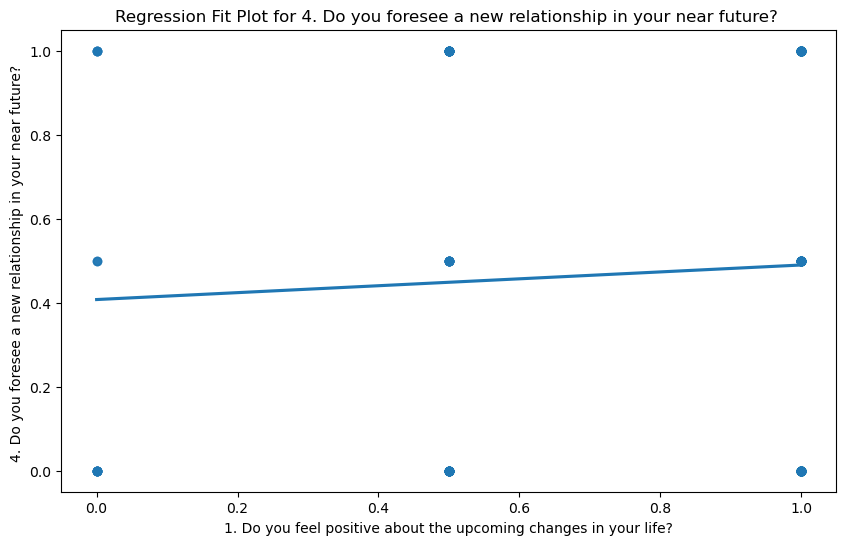

Regression Results for 4. Do you foresee a new relationship in your near future? :
                                                OLS Regression Results                                                
Dep. Variable:     4. Do you foresee a new relationship in your near future?    R-squared:                       0.210
Model:                                                                    OLS   Adj. R-squared:                  0.094
Method:                                                         Least Squares   F-statistic:                     1.810
Date:                                                        Thu, 09 May 2024   Prob (F-statistic):             0.0165
Time:                                                                00:03:24   Log-Likelihood:                -90.126
No. Observations:                                                         188   AIC:                             230.3
Df Residuals:                                                             163   BIC:

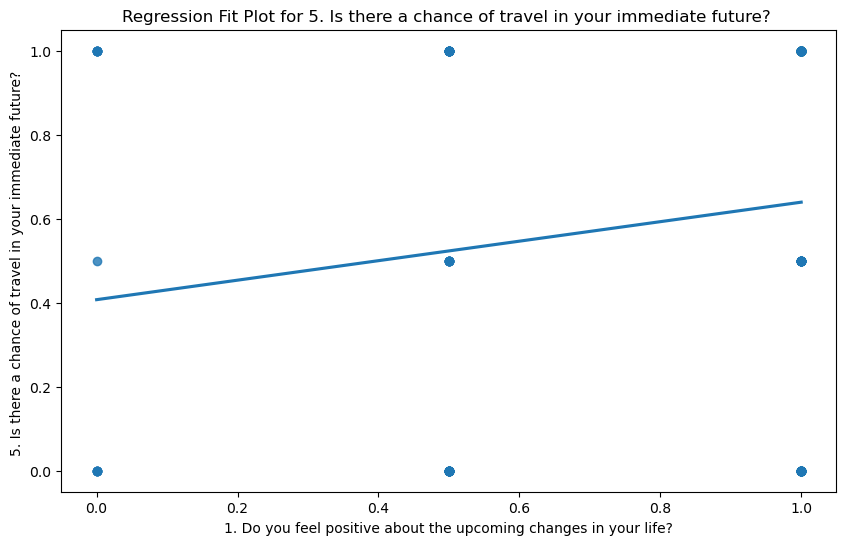

Regression Results for 5. Is there a chance of travel in your immediate future? :
                                                OLS Regression Results                                               
Dep. Variable:     5. Is there a chance of travel in your immediate future?    R-squared:                       0.228
Model:                                                                   OLS   Adj. R-squared:                  0.114
Method:                                                        Least Squares   F-statistic:                     2.001
Date:                                                       Thu, 09 May 2024   Prob (F-statistic):            0.00610
Time:                                                               00:03:24   Log-Likelihood:                -92.496
No. Observations:                                                        188   AIC:                             235.0
Df Residuals:                                                            163   BIC:         

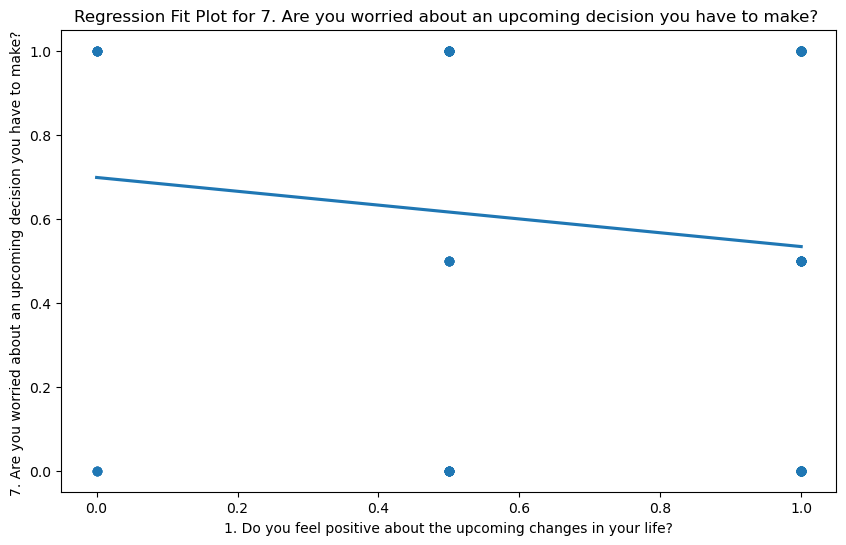

Regression Results for 7. Are you worried about an upcoming decision you have to make? :
                                                   OLS Regression Results                                                   
Dep. Variable:     7. Are you worried about an upcoming decision you have to make?    R-squared:                       0.186
Model:                                                                          OLS   Adj. R-squared:                  0.066
Method:                                                               Least Squares   F-statistic:                     1.549
Date:                                                              Thu, 09 May 2024   Prob (F-statistic):             0.0589
Time:                                                                      00:03:24   Log-Likelihood:                -98.187
No. Observations:                                                               188   AIC:                             246.4
Df Residuals:                       

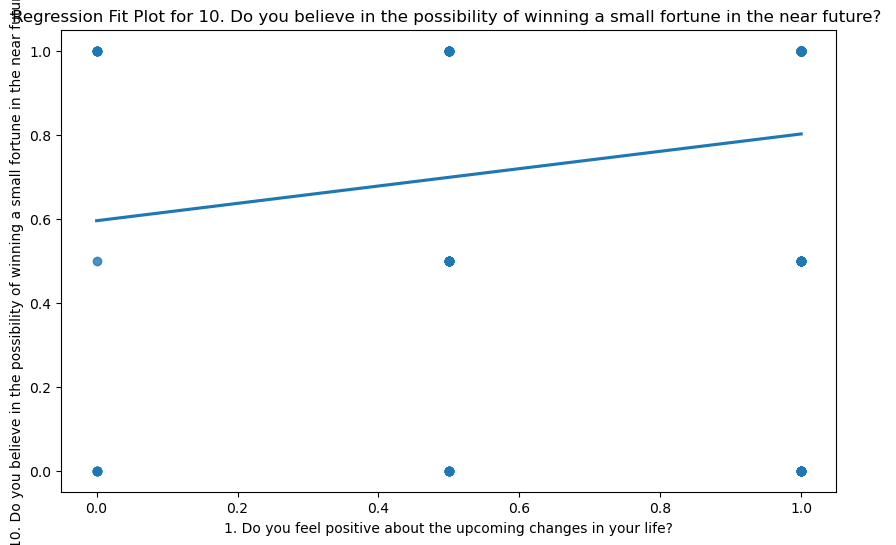

Regression Results for 10. Do you believe in the possibility of winning a small fortune in the near future? :
                                                              OLS Regression Results                                                             
Dep. Variable:     10. Do you believe in the possibility of winning a small fortune in the near future?    R-squared:                       0.315
Model:                                                                                               OLS   Adj. R-squared:                  0.214
Method:                                                                                    Least Squares   F-statistic:                     3.122
Date:                                                                                   Thu, 09 May 2024   Prob (F-statistic):           9.83e-06
Time:                                                                                           00:03:25   Log-Likelihood:                -44.255
No. Observatio

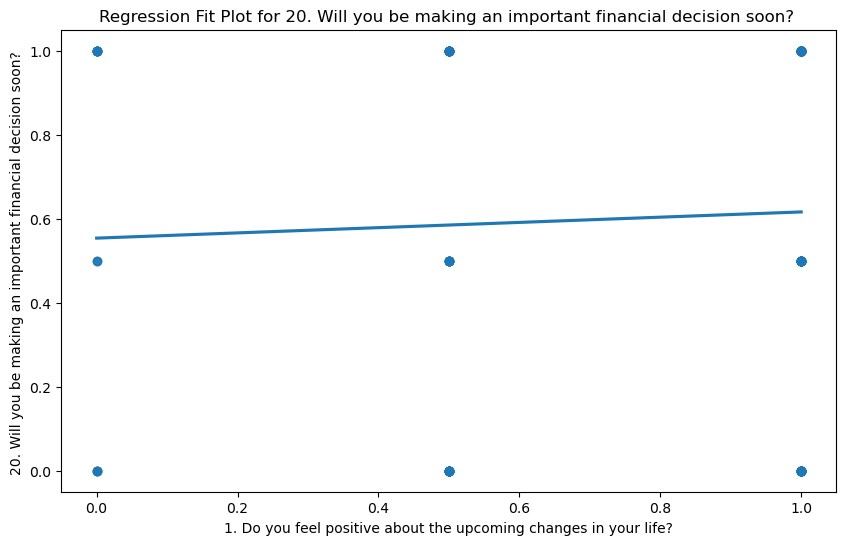

Regression Results for 20. Will you be making an important financial decision soon? :
                                                  OLS Regression Results                                                 
Dep. Variable:     20. Will you be making an important financial decision soon?    R-squared:                       0.347
Model:                                                                       OLS   Adj. R-squared:                  0.251
Method:                                                            Least Squares   F-statistic:                     3.612
Date:                                                           Thu, 09 May 2024   Prob (F-statistic):           5.38e-07
Time:                                                                   00:03:25   Log-Likelihood:                -67.917
No. Observations:                                                            188   AIC:                             185.8
Df Residuals:                                               

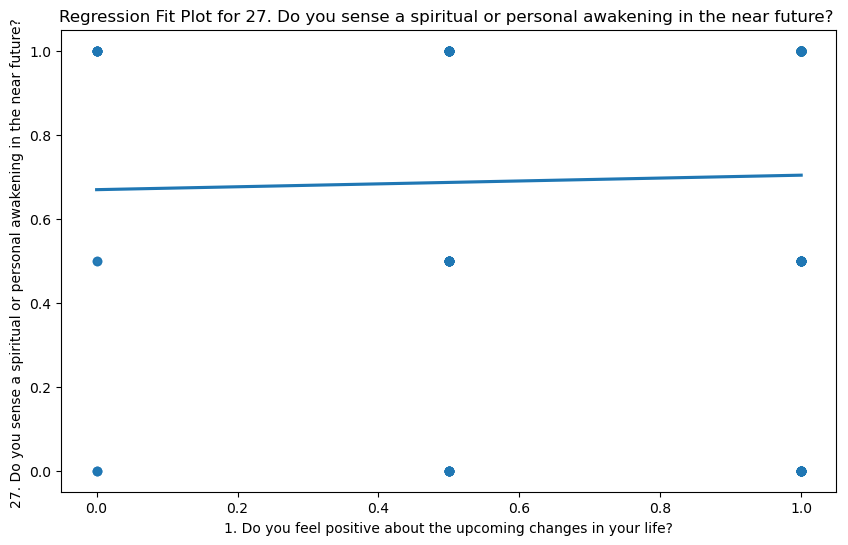

Regression Results for 27. Do you sense a spiritual or personal awakening in the near future? :
                                                       OLS Regression Results                                                      
Dep. Variable:     27. Do you sense a spiritual or personal awakening in the near future?    R-squared:                       0.194
Model:                                                                                 OLS   Adj. R-squared:                  0.075
Method:                                                                      Least Squares   F-statistic:                     1.631
Date:                                                                     Thu, 09 May 2024   Prob (F-statistic):             0.0401
Time:                                                                             00:03:25   Log-Likelihood:                -73.126
No. Observations:                                                                      188   AIC:               

In [67]:
df = pd.read_csv(path)

# Assume survey columns start from the 6th column and responses are 'Yes', 'No', or 'Neutral'
response_mapping = {'Yes': 1, 'No': 0, 'Neutral': 0.5}
for column in df.columns[6:]:
    df[column] = df[column].map(response_mapping)

# Fill missing values with a neutral response (0.5) for visualization purposes
df.fillna(0.5, inplace=True)

# Identify dependent variables based on certain keywords (customize these)
keywords = ['future', 'decision', 'scope']
dependent_vars = [col for col in df.columns[6:] if any(keyword in col.lower() for keyword in keywords)]

# All other survey questions are treated as independent variables
independent_vars = [col for col in df.columns[6:] if col not in dependent_vars]

# Adding a constant to independent variables
X = df[independent_vars]
X = sm.add_constant(X)

# Create plots
for dep_var in dependent_vars:
    Y = df[dep_var]
    model = sm.OLS(Y, X)
    results = model.fit()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X[independent_vars[0]], y=Y, ci=None)
    plt.title(f'Regression Fit Plot for {dep_var}')
    plt.xlabel(independent_vars[0])
    plt.ylabel(dep_var)
    plt.show()

    print(f"Regression Results for {dep_var}:")
    print(results.summary())
    print("\n" + "="*50 + "\n")